In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11, 7)

In [2]:
df =  pd.read_csv('dataFine.csv')

C:\Users\victo\AppData\Local\Temp\ipykernel_17988\4043669217.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('dataFine.csv')


In [3]:
data = df[(df['year']==2020)].reset_index()
data.head(1)

,index,Unnamed: 0,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,year,month
0,1382,1382,40299,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,28-33,0,4,True,False,True,2,2020,Январь


In [4]:
month = [ 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

In [5]:
group_by = pd.pivot_table(data, values="count",index=["year",'month','education','gender', 'hc_didnotwork', 'find_new_job','hc_repeat', 'age'], aggfunc="sum").reset_index()

In [6]:
group_by['month'] = pd.Categorical(group_by['month'], categories = month, ordered=True)

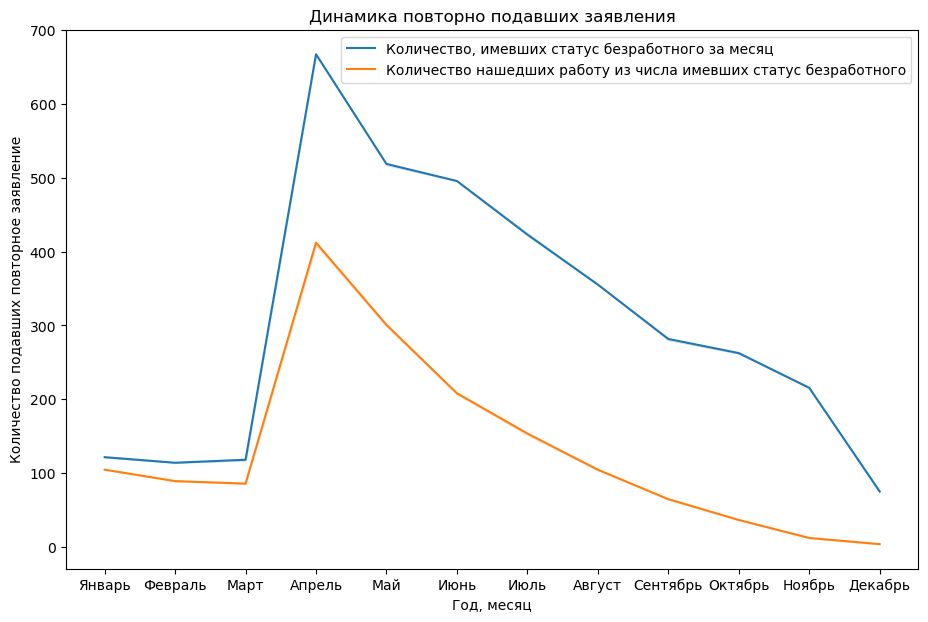

In [7]:
sns.lineplot(data=group_by,x='month',y='count',ci=False,label='Количество, имевших статус безработного за месяц',sort=True)
(sns.lineplot(data=group_by[group_by['find_new_job']==True],x='month',y='count',ci=False, label = 'Количество нашедших работу из числа имевших статус безработного', sort=True)
).set(xlabel='Год, месяц', ylabel = 'Количество подавших повторное заявление', title = 'Динамика повторно подавших заявления')

plt.savefig('Task7_1.png')

In [23]:
group_by

,year,month,education,gender,hc_didnotwork,find_new_job,hc_repeat,age,count
0,2020,Август,0,0,False,False,False,16-21,2696
1,2020,Август,0,0,False,False,False,22-27,6897
2,2020,Август,0,0,False,False,False,28-33,11935
3,2020,Август,0,0,False,False,False,34-39,11997
4,2020,Август,0,0,False,False,False,40-45,7820
...,...,...,...,...,...,...,...,...,...
16325,2020,Январь,9,1,True,False,True,52-57,1
16326,2020,Январь,9,1,True,True,False,22-27,1
16327,2020,Январь,9,1,True,True,False,52-57,1
16328,2020,Январь,9,1,True,True,True,22-27,1
